# Customer Segmentation 

Online Retail II Dataset: This dataset contains transactional data of a UK-based online retailer 

Problem Statement: Retail shop wants to know which customers they want to focus to make it profitable for the company

# Data Inspection

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_score

In [2]:
# read data into python environment
data=pd.read_excel('online_retail_II.xlsx')

In [3]:
# first 3 raws of data
data.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [4]:
# shape of the data
data.shape

(525461, 8)

It has 525461 rows & 8 Columns

In [5]:
# info of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


we have one date column, 3 numerical columns & 4 categorical column

In [38]:
# statistic summary of the data
data.describe()

,Quantity,Price,Amount,Year,Month
count,400916.000000,400916.000000,400916.000000,400916.000000,400916.000000
mean,13.767418,3.305826,21.945330,2009.924493,7.398166
std,97.638385,35.047719,77.758075,0.264208,3.472188
min,1.000000,0.001000,0.001000,2009.000000,1.000000
25%,2.000000,1.250000,5.000000,2010.000000,4.000000
50%,5.000000,1.950000,12.500000,2010.000000,8.000000
75%,12.000000,3.750000,19.500000,2010.000000,11.000000
max,19152.000000,10953.500000,15818.400000,2010.000000,12.000000


Insights:<br>
    1. need to change the datatype of customer ID into object<br>
    2. there is a negative value in count & price column, that could be an error<br>
    3. mean value of count & price columns are high becuase of the presence of high values in these columns<br>

Text(0.5, 0, 'Columns')

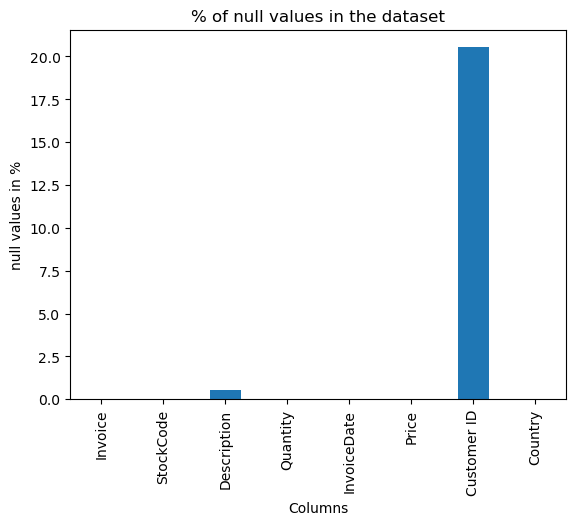

In [7]:
# % null values in each columns

((data.isna().sum()/len(data))*100).plot(kind='bar')
plt.title('% of null values in the dataset')
plt.ylabel('null values in %')
plt.xlabel('Columns')

Notes:</br>
    1. Found 20% null values in the Customer ID column</br>
    2. null values in other columns are too low compared to the total size, so we can drop those rows</br>

In [8]:
# checking the no. of unique values in each columns
data.nunique()

Invoice        28816
StockCode       4632
Description     4681
Quantity         825
InvoiceDate    25296
Price           1606
Customer ID     4383
Country           40
dtype: int64

There is a total of 4383 customers, that we need to make segments

In [9]:
# check for the duplicated rows in the dataset
# occurrence based on all columns
data[data.duplicated()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
523258,538035,20728,LUNCH BAG CARS BLUE,3,2010-12-09 13:03:00,1.65,16065.0,United Kingdom
523356,538051,22659,LUNCH BOX I LOVE LONDON,2,2010-12-09 13:24:00,1.95,18041.0,United Kingdom
525170,538155,21907,I'M ON HOLIDAY METAL SIGN,1,2010-12-09 16:52:00,2.10,16907.0,United Kingdom
525293,538166,21915,RED HARMONICA IN BOX,5,2010-12-09 18:09:00,1.25,17965.0,United Kingdom


so we have 6865 duplicated rows, we will keep only one and will delete other duplicates

# Data Cleaning

<b>Handling of duplicated rows</b>

In [10]:
# Remove the duplicated rows by keeing only one copy
data.drop_duplicates(keep='first',inplace=True)

In [11]:
# change the data type of customer_ID column
data = data.astype({'Customer ID': 'object'})

<b>Handling of Null values</b>

In [12]:
# check for the null values
data[data['Customer ID'].isna()].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom


In [13]:
# we can remove columns with zero price values
data.drop(data[data['Price']<=0.00].index,inplace=True)
data.shape

(514912, 8)

In [14]:
# we can also remove the raws having negative values in quantity
data.drop(data[data['Quantity']<=0.00].index,inplace=True)

In [15]:
# filter the rows having zero customer ID 
df1=data[data["Customer ID"].isna()]
# now find the unique invoice no's in df1
rep=df1['Invoice'].unique()
# for those invoices no's, check if there is any rows having customer ID 
# else drop those rows 
for i in rep:
    # check if there is any rows having customer ID for those invoices
    if(data.loc[data['Invoice']==i,"Customer ID"].isna().all()):
        # dropping those rows
        data.drop(data.loc[data['Invoice']==i,"Customer ID"].isna().index,inplace=True)

In [16]:
#check again the null value count
data.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

Missing values has been removed from the dataset

<b>Handling of Outliers</b>

<AxesSubplot:title={'center':'Outliers in the Dataset'}>

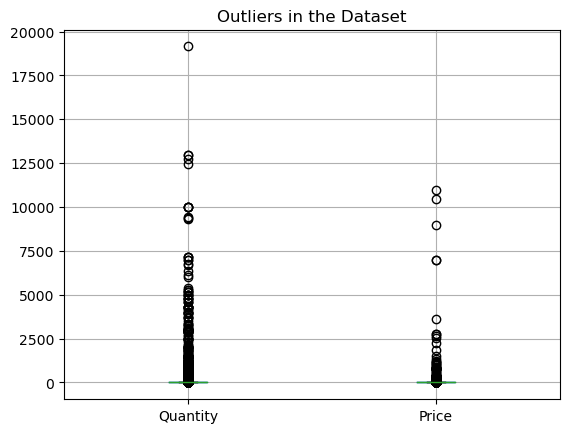

In [17]:
plt.title("Outliers in the Dataset")
data.boxplot()

In this case, we will not handle the outliers. because these are all possible values and replacing them is like altering the values.

In [18]:
# we will remove the space in the column name with '_'
data.columns = data.columns.str.replace(' ', '_')

# Exploratory Data Analysis

In [19]:
# remove zero in the cutomer ID column
data = data.astype({'Customer_ID': int})

In [20]:
# convert back to object column
data = data.astype({'Customer_ID': 'object'})

In [21]:
# add new column for amount
data['Amount']=data["Price"] * data["Quantity"]

In [22]:
#Explore the data
# count the no of invoices per customer
df1=data.groupby("Customer_ID",as_index = False)["Invoice"].count()
# calculte total invoice amount for each customers
df2=data.groupby("Customer_ID",as_index = False)["Amount"].sum()
#rename columns
df1.columns=["Customer_ID",'Count_of_invoices']
df2.columns=["Customer_ID",'Total_Invoice_Amount']
# merging these 2 data frames based on Customer_ID
df=pd.merge(df1,df2,on='Customer_ID')

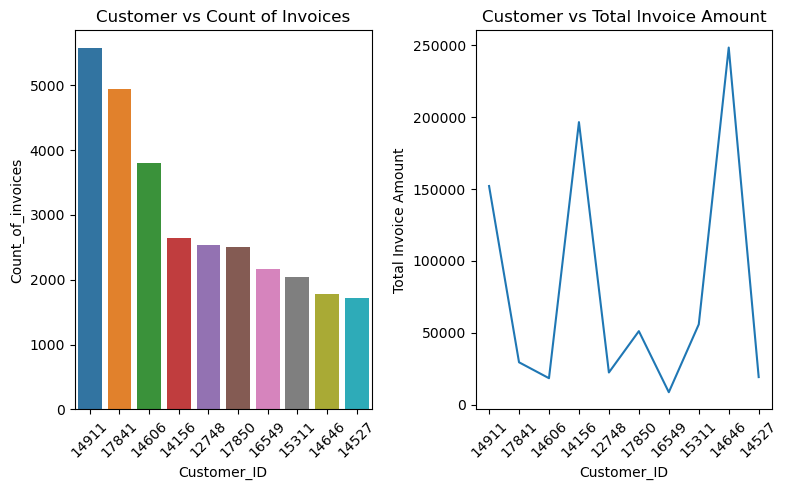

In [23]:
#creating new datafarme for top 10 customers with high no of invoices
ref_df=df.sort_values(by="Count_of_invoices",ascending=False,ignore_index=True).head(10)

#set the figure size
plt.figure(figsize=(8,5))

# devide the plot area  into two
plt.subplot(1,2,1)
# here we converting Customer_ID as string, so that it will follow the same order as in our dataframe
sns.barplot(x=ref_df["Customer_ID"].astype(str),y=ref_df["Count_of_invoices"])
#rotate x-ticks to 45 degrees
plt.xticks(rotation=45)
# add title
plt.title("Customer vs Count of Invoices")

plt.subplot(1,2,2)
#plot Total invoice amount for these customers
plt.plot(ref_df["Customer_ID"].astype(str),ref_df["Total_Invoice_Amount"])
#rotate x-ticks to 45 degrees
plt.xticks(rotation=45)
# add title
plt.title("Customer vs Total Invoice Amount")
plt.xlabel('Customer_ID')
plt.ylabel('Total Invoice Amount')

#adjust the layout with proper spacing
plt.tight_layout()

Note:<br>
    1. Customer having ID 14911 is having high no. of Invoice </br>
    2. Customer 14646 have high total invoice amount compared to the rest</br>
    3. Customer 17841 also having high no of invoice but their total invoice amount is too low compared to the rest</br>

Text(0.5, 1.0, 'Count of Invoices vs Total Invoice Amount')

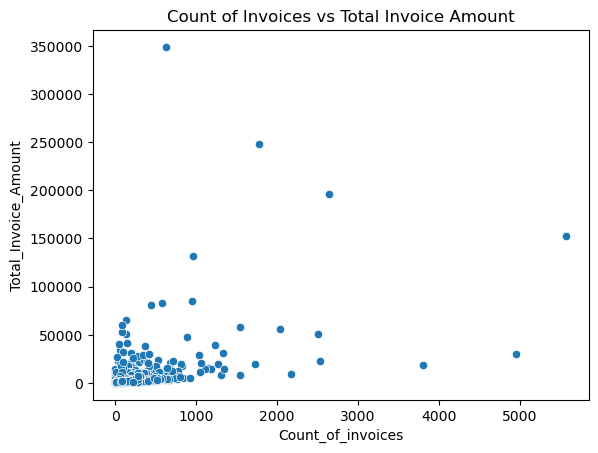

In [24]:
# scatter plot of No. of Invoices vs Amount
sns.scatterplot(x=df['Count_of_invoices'],y=df['Total_Invoice_Amount'])
plt.title("Count of Invoices vs Total Invoice Amount")

Note: </br>
    1. There are some outliers in both the fields</br>
    2. there is no linear realtion between these 2 features

In [25]:
# create a new column for year
data['Year']=data["InvoiceDate"].dt.year

In [26]:
# create a new column for month
data['Month']=data["InvoiceDate"].dt.month

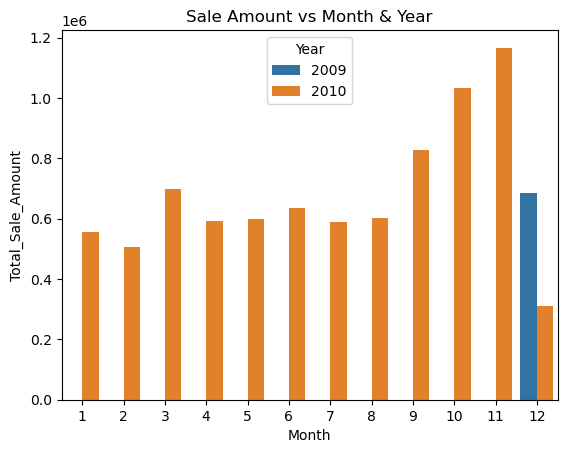

In [27]:
# compare sales of month in december in these years
df3=data.groupby(["Year","Month"],as_index=False)["Amount"].sum()
df3.columns=["Year","Month","Total_Sale_Amount"]
df3=df3.sort_values(by="Month",ignore_index=False)
sns.barplot(x=df3["Month"].astype(str),y=df3["Total_Sale_Amount"],hue=df3["Year"])
plt.title('Sale Amount vs Month & Year')
plt.show()

Note: </br>
    1. there is decrease in salesin Dec 2010 compared to 2010</br>
    2. Season time is between the month of Sept to Nov</br>
    3. we can observe a consistancy in sale amount through out the year</br>
    4. Need to check why there is low sales in Dec 2010, might be loss of data</br>

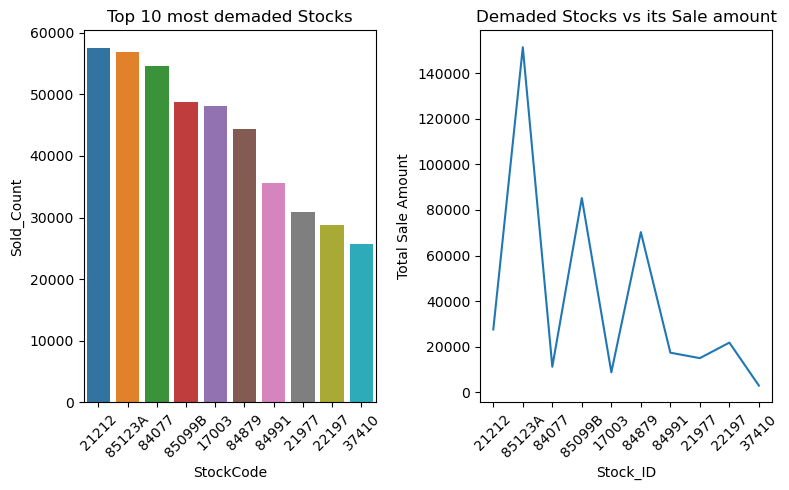

In [28]:
# analysis of stocks
df4=data.groupby(["StockCode"],as_index=False)["Quantity"].sum()
df4.columns=["StockCode","Sold_Count"]


df5=data.groupby("StockCode",as_index=False)["Amount"].sum()
df6=pd.merge(df4,df5,on="StockCode")

df6=df6.sort_values(by="Sold_Count",ascending=False,ignore_index=False)

df7=df6.head(10)
#set the figure size
plt.figure(figsize=(8,5))

# devide the plot area  into two
plt.subplot(1,2,1)
# here we converting Customer_ID as string, so that it will follow the same order as in our dataframe
sns.barplot(x=df7["StockCode"].astype(str),y=df7["Sold_Count"])
#rotate x-ticks to 45 degrees
plt.xticks(rotation=45)
# add title
plt.title("Top 10 most demaded Stocks")

plt.subplot(1,2,2)
#plot Total invoice amount for these customers
plt.plot(df7["StockCode"].astype(str),df7["Amount"])
#rotate x-ticks to 45 degrees
plt.xticks(rotation=45)
# add title
plt.title("Demaded Stocks vs its Sale amount")
plt.xlabel('Stock_ID')
plt.ylabel('Total Sale Amount')

#adjust the layout with proper spacing
plt.tight_layout()

Note:</br>
    1. Stock 85123A has high demand and its sale value also high</br>
    2. Stock ID 21212,84077 are also having high demand even if its sale amount is too low</br>

Text(0.5, 1.0, 'Top 10 Stocks based on their sales amount')

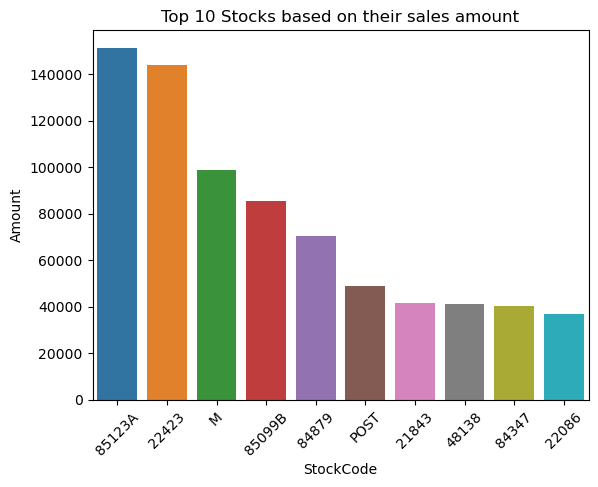

In [29]:
# Top 10 Stock having high sale amount
df8=df5.sort_values('Amount',ignore_index=True,ascending=False).head(10)
sns.barplot(x=df8["StockCode"],y=df8["Amount"])
#rotate x-ticks to 45 degrees
plt.xticks(rotation=45)
# add title
plt.title("Top 10 Stocks based on their sales amount")

Note:</br>
    1. total sale amount is high for Stock ID 85123A </br>
    2. stock id 22423 is also having high total sale amount, but its not in top 10 demanded items</br>

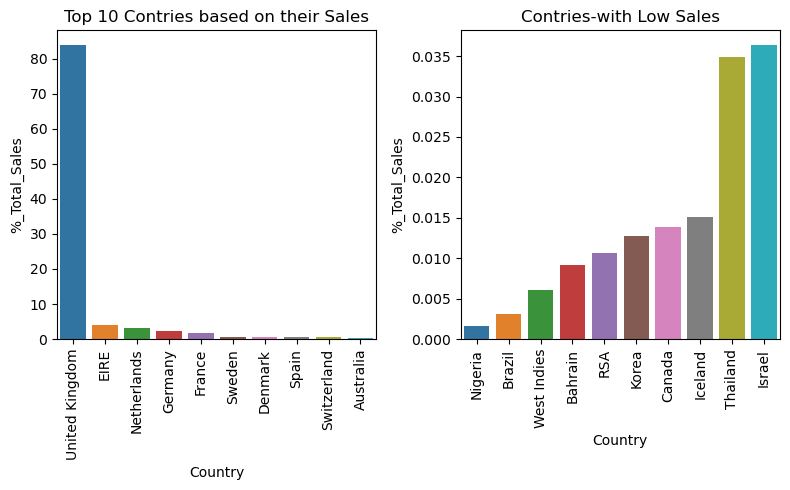

In [30]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
# check the sales per Country
df9=data.groupby('Country',as_index=False)['Amount'].sum()

#calculate Slaes % fro each contires
df9['%_Total_Sales']=df9['Amount'].apply(lambda x: (x/df9['Amount'].sum() )*100)

# filter top 10 contries
df10=df9.sort_values('%_Total_Sales',ascending=False,ignore_index=True).head(10)

#plot it using barplot
sns.barplot(x=df10["Country"],y=df10["%_Total_Sales"])

#rotate x-ticks to 45 degrees
plt.xticks(rotation=90)

# add title
plt.title("Top 10 Contries based on their Sales")

plt.subplot(1,2,2)
#filter contries with low sales
df11=df9.sort_values('%_Total_Sales',ascending=True,ignore_index=True).head(10)


#plot it using barplot
sns.barplot(x=df11["Country"],y=df11["%_Total_Sales"])

#rotate x-ticks to 45 degrees
plt.xticks(rotation=90)

# add title
plt.title("Contries-with Low Sales")

plt.tight_layout()

Note:</br>
    1. its a data of UK-based online retailer, so its 83% of the sales is from UK</br>
    2. very low sales is from Nigeria,less than 0.005%</br>

# CUSTOMER SEGMENATION USING K-MEANS CLUSTERING

In [31]:
data.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,Amount,Year,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,2009,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009,12


In [32]:
# first we will filter those features we accounts for clustering
Cluster_Features=data.groupby('Customer_ID',as_index=False)['Quantity','Price'].sum()

In [33]:
# now standadize these features
std=StandardScaler()

# scaled down the features using Standard Scaler
scaled_features=std.fit_transform(Cluster_Features[['Quantity','Price']])

scaled_features

array([[-0.18739621, -0.11772773],
       [-0.07000745, -0.16832475],
       [-0.14047168, -0.34148056],
       ...,
       [-0.17578122, -0.24146373],
       [-0.10407807, -0.02455274],
       [ 0.02275754, -0.07643188]])

### Finding Optimal value of Clusters using Elbow Method

In [34]:
# create empty array to store within cluster sum of square value
WCSS=[]

# we are finding WCSS for a range of k values
for k in range(1,12):
    # creating an object of Kmeans algorithm
    kmeansobj=KMeans(n_clusters=k,init='k-means++',random_state=42)
    # fit the data to the object
    kmeansobj.fit(scaled_features)
    #calculating the WCSS
    WCSS.append(kmeansobj.inertia_)

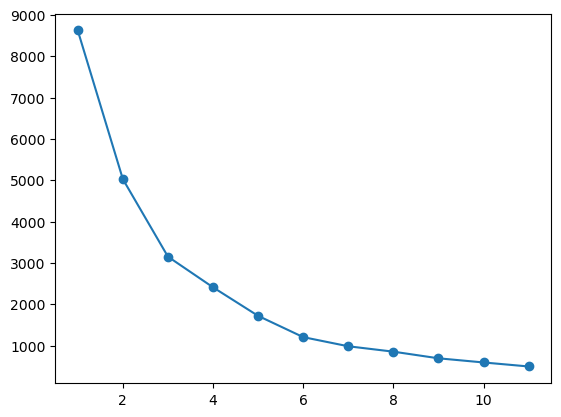

In [35]:
#plot WCSS against k values, to see the elbow point

plt.plot(range(1,12),WCSS,'o-')

Note: as per the above curve optimal value for k is 3

### Evaluation of effectiveness of 3 Clusters

In [36]:
# Lets find the silhouette score for k=3, Its validation method for clustering 

# create a kmeans object
kmeansobj=KMeans(n_clusters=3,init='k-means++',random_state=42)
# fit the data to the obj
kmeansobj.fit(scaled_features)

# Calculate silhouette score
silhouette_avg = silhouette_score(scaled_features, kmeansobj.labels_)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.9665826681159058


A high silhouette score (close to 1) indicates that the data point is well-clustered

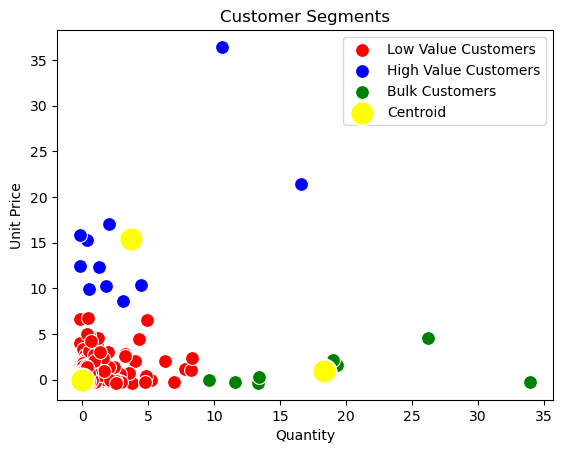

In [44]:
# Now do the clustering for k=3
# creating an object of Kmeans algorithm
kmeansobj=KMeans(n_clusters=3,init='k-means++',random_state=42)
# fit & predict the cluster
y_pred=kmeansobj.fit_predict(scaled_features)

#plot the cluster using scatter plot
sns.scatterplot(scaled_features[y_pred==0,0],scaled_features[y_pred==0,1],s=100,color='red',label='Low Value Customers')
sns.scatterplot(scaled_features[y_pred==1,0],scaled_features[y_pred==1,1],s=100,color='blue',label='High Value Customers')
sns.scatterplot(scaled_features[y_pred==2,0],scaled_features[y_pred==2,1],s=100,color='green',label='Bulk Customers')
sns.scatterplot(kmeansobj.cluster_centers_[:, 0], kmeansobj.cluster_centers_[:, 1], s=300, color='yellow',label='Centroid')

plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.title("Customer Segments")
plt.savefig('Customer Segments.png')

Conclusion:

    1. Low Value Customers: These customers make low purchase of low value products. This segment willnot be profitable for the company

    2. High Value Customers: These  Customers make smaller purchases, but at higher prices, and may be more profitable for the company.so the Company need to concentrate on these customers.company may want to focus on building customer loyalty with this segment by offering personalized services and rewards programs
    
    3.Bulk Customers: These Customers purchase large quantities of low-cost items, indicating a need for the company to offer discounts for larger purchase